In [24]:
from xgboost import XGBRegressor
import pandas as pd
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV

## file_name for merging names and participant_id
../data/pkl/sbr_participant_id_name.pkl

selected_cols = ['event id', 'sportsbook_name','market id', 'participant id', 'description', 'location', 'datetime_x', 'datetime_y', 'decimal odds', 'american odds', 'spread / total', 'participants.1.participant id', 'participants.1.source.nickname', 'participants.1.source.short name', 'participants.2.participant id', 'participants.2.source.nickname', 'participants.2.source.short name']

In [2]:
import xgboost as xgb

In [3]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
import numpy as np
from scipy.stats import randint

In [240]:
def prepping_model_data(preprocessed_path, columns_remove=None):
    '''Return X,y before splitting works for preprocessed data such as ADV_OHE_TEAM_ALL, removes uneccessary columns for analysis'''
    df_train = pd.read_pickle(preprocessed_path)
    #set target_variable
    df_target = df_train['PLUS_MINUS']
    #removes unnecessary data columns
    columns_drop = ['PLUS_MINUS']
    df_X = df_train.drop(columns_drop, axis=1)
    #drops additional columns after feature importance 
    if columns_remove is not None:
        df_X.drop(columns_remove, axis=1, inplace=True)
    X_train, X_test, y_train, y_test = train_test_split(df_X, df_target, random_state=0, test_size=0.3)
    return (X_train, X_test, y_train, y_test)

,GAME_ID,TEAM_ID_h,TEAM_NAME_h,TEAM_ABBREVIATION_h,OFF_RATING_h,DEF_RATING_h,NET_RATING_h,AST_PCT_h,AST_TOV_h,OREB_PCT_h,...,OKC_a,ORL_a,PHI_a,PHX_a,POR_a,SAC_a,SAS_a,TOR_a,UTA_a,WAS_a
1115,42100201,1610612748,Heat,MIA,0.504222,0.311436,0.540519,0.380035,0.109910,0.714592,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3554,22000039,1610612758,Kings,SAC,0.467650,0.604703,0.448622,0.476780,0.042208,0.206823,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2175,22100191,1610612746,Clippers,LAC,0.611580,0.313869,0.608969,0.616462,0.189189,0.564378,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3697,41900154,1610612742,Mavericks,DAL,0.690125,0.646137,0.580618,0.170279,0.053166,0.633262,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
70,22200901,1610612744,Warriors,GSW,0.601930,0.386861,0.555468,0.739054,0.091892,0.324034,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4931,41800122,1610612755,76ers,PHI,0.892168,0.603583,0.761069,0.390093,0.083604,0.904051,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3264,22000350,1610612746,Clippers,LAC,0.669694,0.695409,0.528822,0.532508,0.051542,0.601279,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1653,22100722,1610612739,Cavaliers,CLE,0.574186,0.388078,0.536585,0.614711,0.151351,0.491416,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2607,22000994,1610612745,Rockets,HOU,0.602724,0.774916,0.420217,0.606811,0.072646,0.481876,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [164]:
list(df_train.columns)

['GAME_ID',
 'TEAM_ID_h',
 'TEAM_NAME_h',
 'TEAM_ABBREVIATION_h',
 'OFF_RATING_h',
 'DEF_RATING_h',
 'NET_RATING_h',
 'AST_PCT_h',
 'AST_TOV_h',
 'OREB_PCT_h',
 'DREB_PCT_h',
 'REB_PCT_h',
 'TM_TOV_PCT_h',
 'EFG_PCT_h',
 'TS_PCT_h',
 'PACE_h',
 'POSS_h',
 'GAME_DATE',
 'HOME_TEAM_h',
 'PLUS_MINUS',
 'OFF_RATING_Roll_mean_h',
 'DEF_RATING_Roll_mean_h',
 'NET_RATING_Roll_mean_h',
 'AST_PCT_Roll_mean_h',
 'AST_TOV_Roll_mean_h',
 'OREB_PCT_Roll_mean_h',
 'DREB_PCT_Roll_mean_h',
 'REB_PCT_Roll_mean_h',
 'TM_TOV_PCT_Roll_mean_h',
 'EFG_PCT_Roll_mean_h',
 'TS_PCT_Roll_mean_h',
 'PACE_Roll_mean_h',
 'POSS_Roll_mean_h',
 'OFF_RATING_Roll_median_h',
 'DEF_RATING_Roll_median_h',
 'NET_RATING_Roll_median_h',
 'AST_PCT_Roll_median_h',
 'AST_TOV_Roll_median_h',
 'OREB_PCT_Roll_median_h',
 'DREB_PCT_Roll_median_h',
 'REB_PCT_Roll_median_h',
 'TM_TOV_PCT_Roll_median_h',
 'EFG_PCT_Roll_median_h',
 'TS_PCT_Roll_median_h',
 'PACE_Roll_median_h',
 'POSS_Roll_median_h',
 'OFF_RATING_Roll_std_h',
 'DEF_RATI

In [245]:
df_train = pd.read_pickle("../data/pkl/ADV_OHE_TEAM_ALL")
df_train

,GAME_ID,TEAM_ID_h,TEAM_NAME_h,TEAM_ABBREVIATION_h,OFF_RATING_h,DEF_RATING_h,NET_RATING_h,AST_PCT_h,AST_TOV_h,OREB_PCT_h,...,OKC_a,ORL_a,PHI_a,PHX_a,POR_a,SAC_a,SAS_a,TOR_a,UTA_a,WAS_a
0,22200973,1610612764,Wizards,WAS,0.468034,0.515815,0.384736,0.260946,0.173874,0.592275,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,22200970,1610612746,Clippers,LAC,0.710495,0.673966,0.439811,0.434326,0.096396,0.785408,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,22200969,1610612738,Celtics,BOS,0.482509,0.506083,0.400472,0.560420,0.116216,0.590129,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,22200968,1610612760,Thunder,OKC,0.639324,0.525547,0.490165,0.415061,0.144144,0.564378,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,22200967,1610612745,Rockets,HOU,0.775633,0.419708,0.647522,0.437828,0.181982,0.495708,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5881,21800229,1610612738,Celtics,BOS,0.326901,0.435610,0.470343,0.281734,0.031656,0.641791,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5882,21800228,1610612740,Pelicans,NOP,0.715096,0.567749,0.657477,0.642415,0.092532,0.498934,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5883,21800224,1610612751,Nets,BKN,0.674234,0.743561,0.496241,0.541796,0.077516,0.660981,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5884,21800219,1610612764,Wizards,WAS,0.467650,0.543113,0.493734,0.326625,0.041396,0.511727,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:
df_sbr = pd.read_pickle("../data/pkl/friday_pitch.pkl")
selected_cols = ['event id', 'sportsbook_name','market id', 'participant id', 'description', 'location', 'datetime_x', 'datetime_y', 'decimal odds', 'american odds', 'spread / total', 'participants.1.participant id', 'participants.1.source.nickname', 'participants.1.source.short name', 'participants.2.participant id', 'participants.2.source.nickname', 'participants.2.source.short name']
df_sbr = df_sbr[selected_cols]

In [5]:
df_train.columns

Index(['GAME_ID', 'TEAM_ID_h', 'TEAM_NAME_h', 'TEAM_ABBREVIATION_h',
       'OFF_RATING_h', 'DEF_RATING_h', 'NET_RATING_h', 'AST_PCT_h',
       'AST_TOV_h', 'OREB_PCT_h',
       ...
       'OKC_a', 'ORL_a', 'PHI_a', 'PHX_a', 'POR_a', 'SAC_a', 'SAS_a', 'TOR_a',
       'UTA_a', 'WAS_a'],
      dtype='object', length=175)

In [244]:
df_target = df_train['PLUS_MINUS']
df_target

(5886,)

In [165]:
columns_drop = ['PLUS_MINUS', 'GAME_ID', 'TEAM_ID_h', 'TEAM_NAME_h', 'TEAM_ABBREVIATION_h', 'TEAM_ID_a',
'OFF_RATING_h',
 'TEAM_NAME_a',
 'TEAM_ABBREVIATION_a',
 'DEF_RATING_h',
 'NET_RATING_h',
 'AST_PCT_h',
 'AST_TOV_h',
 'OREB_PCT_h',
 'DREB_PCT_h',
 'REB_PCT_h',
 'TM_TOV_PCT_h',
 'EFG_PCT_h',
 'TS_PCT_h',
 'PACE_h',
 'POSS_h','OFF_RATING_a',
 'DEF_RATING_a',
 'NET_RATING_a',
 'AST_PCT_a',
 'AST_TOV_a',
 'OREB_PCT_a',
 'DREB_PCT_a',
 'REB_PCT_a',
 'TM_TOV_PCT_a',
 'EFG_PCT_a',
 'TS_PCT_a',
 'PACE_a',
 'POSS_a', 'AST_PCT_Roll_std_h',
 'AST_PCT_Roll_median_a',
 'REB_PCT_Roll_std_h',
 'TM_TOV_PCT_Roll_std_h',
 'AST_PCT_Roll_std_a',
 'OREB_PCT_Roll_median_h',
 'OREB_PCT_Roll_std_a',
 'EFG_PCT_Roll_std_h',
 'POSS_Roll_std_a',
 'AST_TOV_Roll_median_h',
 'OREB_PCT_Roll_median_a',
 'AST_PCT_Roll_mean_a',
 'OREB_PCT_Roll_std_h',
 'AST_TOV_Roll_std_a',
 'PACE_Roll_std_h',
 'DREB_PCT_Roll_std_h',
 'REB_PCT_Roll_median_h',
 'PACE_Roll_median_h',
 'TS_PCT_Roll_mean_h',
 'REB_PCT_Roll_mean_h',
 'POSS_Roll_mean_h',
 'AST_PCT_Roll_median_h',
 'EFG_PCT_Roll_median_a',
 'DREB_PCT_Roll_median_h',
 'EFG_PCT_Roll_mean_h',
 'PACE_Roll_mean_h',
 'TM_TOV_PCT_Roll_mean_h',
 'DREB_PCT_Roll_mean_h',
 'OREB_PCT_Roll_mean_h',
 'AST_TOV_Roll_mean_h',
 'AST_PCT_Roll_mean_h',
 'DEF_RATING_Roll_mean_h',
 'OFF_RATING_Roll_mean_h']

In [9]:
df_train = df_train.drop(columns_drop, axis=1)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(df_train, df_target, random_state=0, test_size=0.3)

In [250]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
y_train = scaler.fit_transform(np.array(y_train).reshape(-1, 1))
y_test = scaler.transform(np.array(y_test).reshape(-1, 1))

In [251]:
y_train

array([[0.58156028],
       [0.36879433],
       [0.67375887],
       ...,
       [0.59574468],
       [0.34042553],
       [0.59574468]])

In [18]:
dtrain_reg = xgb.DMatrix(X_train, y_train)
dtest_reg = xgb.DMatrix(X_test, y_test)

In [19]:
xg_model = XGBRegressor(subsample= 0.39, reg_lambda= 0.028299,reg_alpha=0.033299, objective= 'reg:pseudohubererror', n_estimators= 650, max_depth=32, 
                        learning_rate = 0.021399, huber_slope=4.56, n_jobs=-1)

In [20]:
xg_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, huber_slope=4.56,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.021399, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=32,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, n_estimators=650, n_jobs=-1,
             num_parallel_tree=None, objective='reg:pseudohubererror', ...)

In [21]:
cross_val_score(xg_model, X_train, y_train, cv=5)

array([0.45810264, 0.50933166, 0.47499797, 0.4490659 , 0.51383483])

In [38]:
r2_score(y_test, xg_model.predict(X_test))

0.4751805564300373

In [35]:
y_test.ravel()

array([0.53191489, 0.53900709, 0.39716312, ..., 0.43971631, 0.53900709,
       0.53191489])

In [28]:
rmse = mean_squared_error(y_test, xg_model.predict(X_test), squared=False)
rmse

0.07359916379221514

In [29]:
import seaborn as sns

<Axes: ylabel='Count'>

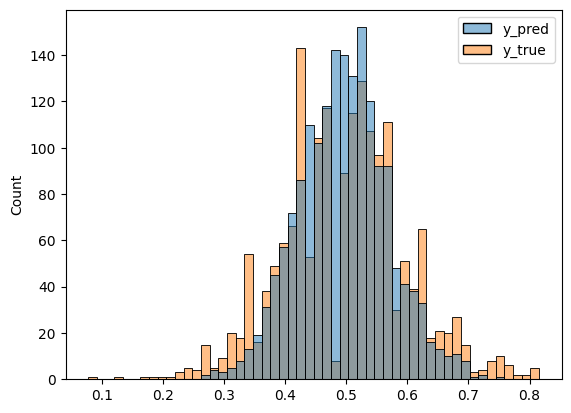

In [36]:
sns.histplot(pd.DataFrame({'y_pred':xg_model.predict(X_test), 'y_true':y_test.ravel()}))

In [166]:
df_pinnacle = pd.read_csv('../data/csv/pinnacle_sportsbook.csv')
df_teamnames = pd.read_pickle('../data/pkl/raw_games_5yrs.pkl')
df_teamnames = df_teamnames[['TEAM_NAME', 'TEAM_ABBREVIATION']]

In [167]:
df_pinnacle_spread = df_pinnacle[['participant id', 'description', 'decimal odds', 'american odds', 'spread / total']]

In [168]:
df_pinnacle_names = df_pinnacle[['participants.1.participant id', 'participants.1.source.nickname',
       'participants.1.source.short name', 'participants.2.participant id',
       'participants.2.source.nickname', 'participants.2.source.short name']]

In [169]:
df_pinnacle_names['p1_full'] = df_pinnacle_names['participants.1.source.short name'] + ' ' + df_pinnacle_names['participants.1.source.nickname']
df_pinnacle_names['p2_full'] = df_pinnacle_names['participants.2.source.short name'] + ' ' + df_pinnacle_names['participants.2.source.nickname']
df_pinnacle_names['p2_full'] = df_pinnacle_names['p2_full'].replace({'L.A. Clippers L.A. Clippers': 'LA Clippers', 'L.A. Lakers L.A. Lakers': 'Los Angeles Lakers'})
df_pinnacle_names['p1_full'] = df_pinnacle_names['p1_full'].replace({'L.A. Clippers L.A. Clippers': 'LA Clippers', 'L.A. Lakers L.A. Lakers': 'Los Angeles Lakers'})
df_pinnacle_names['participants.2.source.short name'] = df_pinnacle_names['participants.2.source.short name'].replace({'L.A. Clippers': 'Los Angeles ', 'L.A. Lakers': 'Los Angeles'})
df_pinnacle_names['participants.1.source.short name'] = df_pinnacle_names['participants.1.source.short name'].replace({'L.A. Clippers': 'Los Angeles ', 'L.A. Lakers': 'Los Angeles'})
df_pinnacle_names = df_pinnacle_names[df_pinnacle_names['p1_full'].isin(pd.unique(df_teamnames['TEAM_NAME']))]
df_pinnacle_names = df_pinnacle_names[df_pinnacle_names['p2_full'].isin(pd.unique(df_teamnames['TEAM_NAME']))]

/tmp/ipykernel_22565/4062104900.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pinnacle_names['p1_full'] = df_pinnacle_names['participants.1.source.short name'] + ' ' + df_pinnacle_names['participants.1.source.nickname']
/tmp/ipykernel_22565/4062104900.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pinnacle_names['p2_full'] = df_pinnacle_names['participants.2.source.short name'] + ' ' + df_pinnacle_names['participants.2.source.nickname']
/tmp/ipykernel_22565/4062104900.py:3: SettingWithCopyW

In [170]:
full_names_participant = df_pinnacle_names.drop_duplicates('participants.1.participant id')

In [171]:
full_names_participant['participant id'] = full_names_participant['participants.1.participant id']

/tmp/ipykernel_22565/274799569.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  full_names_participant['participant id'] = full_names_participant['participants.1.participant id']


In [172]:
full_names_participant['TEAM_NAME'] = full_names_participant['p1_full']

/tmp/ipykernel_22565/3254063149.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  full_names_participant['TEAM_NAME'] = full_names_participant['p1_full']


In [173]:
full_temp = full_names_participant[['participant id','TEAM_NAME', 'participants.1.source.short name']]

In [174]:
full_name_abb = pd.merge(full_temp, df_teamnames, on='TEAM_NAME').drop_duplicates('participant id')

In [175]:
full_name_abb['HOME_LOCATION'] = full_name_abb['participants.1.source.short name']

In [72]:
full_name_abb = full_name_abb[['participant id', 'TEAM_NAME', 'TEAM_ABBREVIATION', 'HOME_LOCATION']]

In [99]:
home_name_abb = full_name_abb[['TEAM_NAME', 'TEAM_ABBREVIATION']]
home_name_abb.rename(columns={'TEAM_NAME':'home_team'}, inplace=True)

/tmp/ipykernel_22565/1153266222.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  home_name_abb.rename(columns={'TEAM_NAME':'home_team'}, inplace=True)


In [100]:
away_name_abb = full_name_abb[['TEAM_NAME', 'TEAM_ABBREVIATION']]
away_name_abb.rename(columns={'TEAM_NAME':'away_team'}, inplace=True)

/tmp/ipykernel_22565/139466013.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  away_name_abb.rename(columns={'TEAM_NAME':'away_team'}, inplace=True)


## removed all star matches 'Team Durant East Team Durant East', 'Team LeBron  LeBron','Team LeBron LeBron', 'Team World World', 'Team Giannis Giannis','nan'

In [191]:
df_nba = pd.read_pickle('../data/pkl/raw_games_5yrs.pkl')

In [192]:
df_nba.columns

Index(['SEASON_ID', 'TEAM_ID', 'TEAM_ABBREVIATION', 'TEAM_NAME', 'GAME_ID',
       'GAME_DATE', 'MATCHUP', 'WL', 'MIN', 'PTS', 'FGM', 'FGA', 'FG_PCT',
       'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB', 'DREB',
       'REB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PLUS_MINUS', 'HOME_TEAM'],
      dtype='object')

In [193]:
df_nba['GAME_DATE'] = pd.to_datetime(df_nba['GAME_DATE'], format='%Y-%M-%D')

In [194]:
presentation_df = pd.merge(df_sbr, full_name_abb, on='participant id')

In [195]:
presentation_df['GAME_DATE'] = presentation_df['datetime_x']

In [196]:
presentation_df.drop(['datetime_x','market id'], axis=1, inplace=True)

In [197]:
presentation_df['HOME_TEAM'] = np.where(presentation_df['HOME_LOCATION']==presentation_df['location'], 1, 0)

In [198]:
pres_df = presentation_df[['event id', 'TEAM_NAME','TEAM_ABBREVIATION', 'HOME_LOCATION', 'GAME_DATE', 'HOME_TEAM', 'sportsbook_name', 'participant id', 'description', 'location', 'decimal odds', 'american odds', 'spread / total']]

In [199]:
pres_df[['away_team', 'home_team']] = pres_df['description'].str.split('@', expand=True)

/tmp/ipykernel_22565/3866878284.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pres_df[['away_team', 'home_team']] = pres_df['description'].str.split('@', expand=True)
/tmp/ipykernel_22565/3866878284.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pres_df[['away_team', 'home_team']] = pres_df['description'].str.split('@', expand=True)


In [200]:
pres_df = pd.merge(pres_df, home_name_abb, on='home_team')

In [201]:
pres_df = pd.merge(pres_df, away_name_abb, on='away_team')

In [202]:
pres_df

,event id,TEAM_NAME,TEAM_ABBREVIATION_x,HOME_LOCATION,GAME_DATE,HOME_TEAM,sportsbook_name,participant id,description,location,decimal odds,american odds,spread / total,away_team,home_team,TEAM_ABBREVIATION_y,TEAM_ABBREVIATION
0,4667290,Charlotte Hornets,CHA,Charlotte,2022-12-31,1,pinnacle,1162,Brooklyn Nets@Charlotte Hornets,Charlotte,1.9524,-105,6.5,Brooklyn Nets,Charlotte Hornets,CHA,BKN
1,4667290,Brooklyn Nets,BKN,Brooklyn,2022-12-31,0,pinnacle,1169,Brooklyn Nets@Charlotte Hornets,Charlotte,1.9524,-105,-6.5,Brooklyn Nets,Charlotte Hornets,CHA,BKN
2,4667977,Brooklyn Nets,BKN,Brooklyn,2023-02-26,0,pinnacle,1169,Brooklyn Nets@Atlanta Hawks,Atlanta,1.9524,-105,5.0,Brooklyn Nets,Atlanta Hawks,ATL,BKN
3,4667977,Atlanta Hawks,ATL,Atlanta,2023-02-26,1,pinnacle,1159,Brooklyn Nets@Atlanta Hawks,Atlanta,1.9524,-105,-5.0,Brooklyn Nets,Atlanta Hawks,ATL,BKN
4,4667958,Brooklyn Nets,BKN,Brooklyn,2023-01-20,0,pinnacle,1169,Brooklyn Nets@Utah Jazz,Salt Lake City,1.9524,-105,7.0,Brooklyn Nets,Utah Jazz,UTA,BKN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
545,4667716,Houston Rockets,HOU,Houston,2023-01-13,0,pinnacle,1155,Houston Rockets@Sacramento Kings,Sacramento,1.9524,-105,10.0,Houston Rockets,Sacramento Kings,SAC,HOU
546,4667650,Sacramento Kings,SAC,Sacramento,2023-01-11,1,pinnacle,1150,Houston Rockets@Sacramento Kings,Sacramento,1.9091,-110,-9.0,Houston Rockets,Sacramento Kings,SAC,HOU
547,4667716,Sacramento Kings,SAC,Sacramento,2023-01-13,1,pinnacle,1150,Houston Rockets@Sacramento Kings,Sacramento,1.9524,-105,-10.0,Houston Rockets,Sacramento Kings,SAC,HOU
548,4668006,Houston Rockets,HOU,Houston,2023-02-26,0,pinnacle,1155,Houston Rockets@Portland Trail Blazers,Portland,1.9524,-105,9.5,Houston Rockets,Portland Trail Blazers,POR,HOU


In [203]:
pres_df.rename(columns={'TEAM_ABBREVIATION_y': 'TEAM_ABBREVIATION_h', 'TEAM_ABBREVIATION':'TEAM_ABBREVIATION_a', 'TEAM_ABBREVIATION_x':'TEAM_ABBREVIATION'}, inplace=True)

In [206]:
pres_df['MATCHUP'] = np.where(pres_df['HOME_TEAM']==1, pres_df['TEAM_ABBREVIATION_h'] + ' vs. ' + pres_df['TEAM_ABBREVIATION_a'], pres_df['TEAM_ABBREVIATION_a'] + ' @ ' + 
                                  pres_df['TEAM_ABBREVIATION_h'])

In [207]:
pres_df['GAME_DATE'] =  pd.to_datetime(pres_df['GAME_DATE'])

In [208]:
pres_df

,event id,TEAM_NAME,TEAM_ABBREVIATION,HOME_LOCATION,GAME_DATE,HOME_TEAM,sportsbook_name,participant id,description,location,decimal odds,american odds,spread / total,away_team,home_team,TEAM_ABBREVIATION_h,TEAM_ABBREVIATION_a,MATCHUP
0,4667290,Charlotte Hornets,CHA,Charlotte,2022-12-31,1,pinnacle,1162,Brooklyn Nets@Charlotte Hornets,Charlotte,1.9524,-105,6.5,Brooklyn Nets,Charlotte Hornets,CHA,BKN,CHA vs. BKN
1,4667290,Brooklyn Nets,BKN,Brooklyn,2022-12-31,0,pinnacle,1169,Brooklyn Nets@Charlotte Hornets,Charlotte,1.9524,-105,-6.5,Brooklyn Nets,Charlotte Hornets,CHA,BKN,BKN @ CHA
2,4667977,Brooklyn Nets,BKN,Brooklyn,2023-02-26,0,pinnacle,1169,Brooklyn Nets@Atlanta Hawks,Atlanta,1.9524,-105,5.0,Brooklyn Nets,Atlanta Hawks,ATL,BKN,BKN @ ATL
3,4667977,Atlanta Hawks,ATL,Atlanta,2023-02-26,1,pinnacle,1159,Brooklyn Nets@Atlanta Hawks,Atlanta,1.9524,-105,-5.0,Brooklyn Nets,Atlanta Hawks,ATL,BKN,ATL vs. BKN
4,4667958,Brooklyn Nets,BKN,Brooklyn,2023-01-20,0,pinnacle,1169,Brooklyn Nets@Utah Jazz,Salt Lake City,1.9524,-105,7.0,Brooklyn Nets,Utah Jazz,UTA,BKN,BKN @ UTA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
545,4667716,Houston Rockets,HOU,Houston,2023-01-13,0,pinnacle,1155,Houston Rockets@Sacramento Kings,Sacramento,1.9524,-105,10.0,Houston Rockets,Sacramento Kings,SAC,HOU,HOU @ SAC
546,4667650,Sacramento Kings,SAC,Sacramento,2023-01-11,1,pinnacle,1150,Houston Rockets@Sacramento Kings,Sacramento,1.9091,-110,-9.0,Houston Rockets,Sacramento Kings,SAC,HOU,SAC vs. HOU
547,4667716,Sacramento Kings,SAC,Sacramento,2023-01-13,1,pinnacle,1150,Houston Rockets@Sacramento Kings,Sacramento,1.9524,-105,-10.0,Houston Rockets,Sacramento Kings,SAC,HOU,SAC vs. HOU
548,4668006,Houston Rockets,HOU,Houston,2023-02-26,0,pinnacle,1155,Houston Rockets@Portland Trail Blazers,Portland,1.9524,-105,9.5,Houston Rockets,Portland Trail Blazers,POR,HOU,HOU @ POR


In [187]:
df_nba[df_nba['GAME_DATE'] > '2023-01-01'].sort_values('GAME_DATE')

,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,PTS,...,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS,HOME_TEAM
28,22022,1610612766,CHA,Charlotte Hornets,22200551,2023-01-02,CHA vs. LAL,L,240,115,...,8.0,39.0,47.0,24,8.0,7,14,22,-6.0,1
28,22022,1610612761,TOR,Toronto Raptors,22200553,2023-01-02,TOR @ IND,L,239,114,...,12.0,24.0,36.0,26,5.0,11,11,27,-8.0,0
27,22022,1610612744,GSW,Golden State Warriors,22200558,2023-01-02,GSW vs. ATL,W,290,143,...,23.0,46.0,69.0,34,9.0,6,19,23,2.0,1
28,22022,1610612759,SAS,San Antonio Spurs,22200555,2023-01-02,SAS @ BKN,L,243,103,...,15.0,28.0,43.0,26,5.0,4,18,13,-36.0,0
28,22022,1610612757,POR,Portland Trail Blazers,22200559,2023-01-02,POR vs. DET,W,240,135,...,6.0,38.0,44.0,29,16.0,6,18,27,29.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,22022,1610612763,MEM,Memphis Grizzlies,22200970,2023-03-05,MEM @ LAC,L,240,129,...,2.0,24.0,26.0,32,13.0,3,8,23,-6.0,0
0,22022,1610612766,CHA,Charlotte Hornets,22200965,2023-03-05,CHA @ BKN,L,240,86,...,5.0,44.0,49.0,17,2.0,3,10,19,-16.0,0
0,22022,1610612764,WAS,Washington Wizards,22200973,2023-03-05,WAS vs. MIL,L,239,111,...,20.0,36.0,56.0,21,8.0,2,9,19,-6.0,1
0,22022,1610612754,IND,Indiana Pacers,22200963,2023-03-05,IND @ CHI,W,241,125,...,13.0,22.0,35.0,27,5.0,6,9,18,6.4,0


In [209]:
temp_merged = pd.merge(pres_df[['GAME_DATE', 'MATCHUP', 'TEAM_ABBREVIATION_a', 'TEAM_ABBREVIATION_h', 'spread / total','decimal odds', 'american odds']], df_nba, on=['GAME_DATE', 'MATCHUP'])

In [210]:
temp_merged.

Index(['GAME_DATE', 'MATCHUP', 'TEAM_ABBREVIATION_a', 'TEAM_ABBREVIATION_h',
       'spread / total', 'SEASON_ID', 'TEAM_ID', 'TEAM_ABBREVIATION',
       'TEAM_NAME', 'GAME_ID', 'WL', 'MIN', 'PTS', 'FGM', 'FGA', 'FG_PCT',
       'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB', 'DREB',
       'REB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PLUS_MINUS', 'HOME_TEAM'],
      dtype='object')

In [83]:
df_nba

,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,PTS,...,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS,HOME_TEAM
0,22022,1610612737,ATL,Atlanta Hawks,22200958,2023-03-04,ATL @ MIA,L,239,109,...,10.0,27.0,37.0,22,12.0,1,16,23,-8.0,0
1,22022,1610612737,ATL,Atlanta Hawks,22200947,2023-03-03,ATL vs. POR,W,239,129,...,10.0,33.0,43.0,30,10.0,5,17,19,18.0,1
2,22022,1610612737,ATL,Atlanta Hawks,22200923,2023-02-28,ATL vs. WAS,L,239,116,...,13.0,29.0,42.0,21,4.0,7,9,17,-3.0,1
3,22022,1610612737,ATL,Atlanta Hawks,22200911,2023-02-26,ATL vs. BKN,W,240,129,...,13.0,33.0,46.0,20,7.0,2,15,18,2.0,1
4,22022,1610612737,ATL,Atlanta Hawks,22200896,2023-02-24,ATL vs. CLE,W,240,136,...,5.0,37.0,42.0,28,7.0,8,14,21,17.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426,22017,1610612766,CHA,Charlotte Hornets,21701021,2018-03-15,CHA @ ATL,W,239,129,...,6.0,39.0,45.0,30,3.0,3,10,21,12.0,0
427,22017,1610612766,CHA,Charlotte Hornets,21701011,2018-03-13,CHA @ NOP,L,241,115,...,8.0,37.0,45.0,22,8.0,9,13,13,-4.0,0
428,22017,1610612766,CHA,Charlotte Hornets,21700987,2018-03-10,CHA vs. PHX,W,239,122,...,7.0,34.0,41.0,24,11.0,5,12,18,5.0,1
429,22017,1610612766,CHA,Charlotte Hornets,21700972,2018-03-08,CHA vs. BKN,L,241,111,...,6.0,30.0,36.0,19,5.0,5,13,21,-11.0,1


In [214]:
def create_pysbr_team_names(nba_path, pysbr_path):
    '''takes pickle files and preprocess them for easy comparison of sports betting team naming format'''
    df_sbr = pd.read_pickle(pysbr_path).copy()
    df_teamnames = pd.read_pickle(nba_path)
    df_teamnames = df_teamnames[['TEAM_NAME', 'TEAM_ABBREVIATION']]
    
    #----------------maps participant name into the nba format----------------------------------------
    df_sbr = df_sbr[['participants.1.participant id', 'participants.1.source.nickname',
       'participants.1.source.short name', 'participants.2.participant id',
       'participants.2.source.nickname', 'participants.2.source.short name']]
    df_sbr['p1_full'] = df_sbr['participants.1.source.short name'] + ' ' + df_sbr['participants.1.source.nickname']
    df_sbr['p2_full'] = df_sbr['participants.2.source.short name'] + ' ' + df_sbr['participants.2.source.nickname']
    df_sbr['p2_full'] = df_sbr['p2_full'].replace({'L.A. Clippers L.A. Clippers': 'LA Clippers', 'L.A. Lakers L.A. Lakers': 'Los Angeles Lakers'})
    df_sbr['p1_full'] = df_sbr['p1_full'].replace({'L.A. Clippers L.A. Clippers': 'LA Clippers', 'L.A. Lakers L.A. Lakers': 'Los Angeles Lakers'})
    df_sbr['participants.2.source.short name'] = df_sbr['participants.2.source.short name'].replace({'L.A. Clippers': 'Los Angeles ', 'L.A. Lakers': 'Los Angeles'})
    df_sbr['participants.1.source.short name'] = df_sbr['participants.1.source.short name'].replace({'L.A. Clippers': 'Los Angeles ', 'L.A. Lakers': 'Los Angeles'})
    df_sbr = df_sbr[df_sbr['p1_full'].isin(pd.unique(df_teamnames['TEAM_NAME']))]
    df_sbr = df_sbr[df_sbr['p2_full'].isin(pd.unique(df_teamnames['TEAM_NAME']))]
    full_names_participant = df_sbr.drop_duplicates('participants.1.participant id')
    full_names_participant['participant id'] = full_names_participant['participants.1.participant id'].copy()
    full_names_participant['TEAM_NAME'] = full_names_participant['p1_full'].copy()
    full_temp = full_names_participant[['participant id','TEAM_NAME', 'participants.1.source.short name']]
    full_name_abb = pd.merge(full_temp, df_teamnames, on='TEAM_NAME').drop_duplicates('participant id')
    full_name_abb['HOME_LOCATION'] = full_name_abb['participants.1.source.short name']
    full_name_abb = full_name_abb[['participant id', 'TEAM_NAME', 'TEAM_ABBREVIATION', 'HOME_LOCATION']]
    #---------------------------------------------------------------------------------------------------   
    home_name_abb = full_name_abb[['TEAM_NAME', 'TEAM_ABBREVIATION']]
    home_name_abb.rename(columns={'TEAM_NAME':'home_team'}, inplace=True)
    
    away_name_abb = full_name_abb[['TEAM_NAME', 'TEAM_ABBREVIATION']]
    away_name_abb.rename(columns={'TEAM_NAME':'away_team'}, inplace=True)
    
    return (home_name_abb, away_name_abb, full_name_abb)

nba_path = '../data/pkl/raw_games_5yrs.pkl'
pysbr_path = '../data/pkl/pysbr_raw.pkl'
home_name_abb, away_name_abb, full_name_abb = create_pysbr_team_names(nba_path, pysbr_path)

/tmp/ipykernel_22565/1743215541.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  full_names_participant['participant id'] = full_names_participant['participants.1.participant id'].copy()
/tmp/ipykernel_22565/1743215541.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  full_names_participant['TEAM_NAME'] = full_names_participant['p1_full'].copy()
/tmp/ipykernel_22565/1743215541.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the doc

In [238]:
def create_mergeable_pysbr(nba_path, pysbr_path):
    '''extracts betting odds for mergeable pysbr'''
    home_name_abb, away_name_abb, full_name_abb = create_pysbr_team_names(nba_path, pysbr_path)
    df_sbr = pd.read_pickle(pysbr_path).copy()
    df_nba = pd.read_pickle(nba_path).copy()
    df_nba['GAME_DATE'] = pd.to_datetime(df_nba['GAME_DATE'], format='%Y-%M-%D')

    merged_sbr_df = pd.merge(df_sbr, full_name_abb, on='participant id')
    merged_sbr_df['GAME_DATE'] = merged_sbr_df['datetime_x']
    merged_sbr_df.drop(['datetime_x'], axis=1, inplace=True)
    merged_sbr_df['HOME_TEAM'] = np.where(merged_sbr_df['HOME_LOCATION']==merged_sbr_df['location'], 1, 0)
    selected_sbr_df = merged_sbr_df[['event id', 'TEAM_NAME','TEAM_ABBREVIATION', 'HOME_LOCATION', 'GAME_DATE', 'HOME_TEAM', 'sportsbook_name', 'participant id', 
                               'description', 'location', 'decimal odds', 'american odds', 'spread / total']]

    selected_sbr_df[['away_team', 'home_team']] = selected_sbr_df['description'].str.split('@', expand=True)
    selected_sbr_df = pd.merge(selected_sbr_df, home_name_abb, on='home_team')
    selected_sbr_df = pd.merge(selected_sbr_df, away_name_abb, on='away_team')
    selected_sbr_df.rename(columns={'TEAM_ABBREVIATION_y': 'TEAM_ABBREVIATION_h', 'TEAM_ABBREVIATION':'TEAM_ABBREVIATION_a', 'TEAM_ABBREVIATION_x':'TEAM_ABBREVIATION'}, inplace=True)

    selected_sbr_df['MATCHUP'] = np.where(selected_sbr_df['HOME_TEAM']==1, selected_sbr_df['TEAM_ABBREVIATION_h'] + ' vs. ' + selected_sbr_df['TEAM_ABBREVIATION_a'], 
                                          selected_sbr_df['TEAM_ABBREVIATION_a'] + ' @ ' + selected_sbr_df['TEAM_ABBREVIATION_h'])

    selected_sbr_df['GAME_DATE'] =  pd.to_datetime(selected_sbr_df['GAME_DATE']).dt.date
    selected_sbr_df['GAME_DATE'] =  pd.to_datetime(selected_sbr_df['GAME_DATE'])
    output_df = pd.merge(df_nba, selected_sbr_df[['GAME_DATE', 'sportsbook_name', 'MATCHUP', 'TEAM_ABBREVIATION_a', 'TEAM_ABBREVIATION_h', 'spread / total', 'decimal odds', 'american odds']], on=
                         ['GAME_DATE', 'MATCHUP'])
    
    return output_df[['GAME_ID', 'GAME_DATE', 'TEAM_ABBREVIATION_a', 'TEAM_ABBREVIATION_h', 'sportsbook_name', 'spread / total', 'decimal odds', 'american odds']].sort_values('GAME_DATE')





nba_path = '../data/pkl/raw_games_5yrs.pkl'
pysbr_path = '../data/pkl/pysbr_raw.pkl'
output_df = create_mergeable_pysbr(nba_path, pysbr_path)
output_df

/tmp/ipykernel_22565/1743215541.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  full_names_participant['participant id'] = full_names_participant['participants.1.participant id'].copy()
/tmp/ipykernel_22565/1743215541.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  full_names_participant['TEAM_NAME'] = full_names_participant['p1_full'].copy()
/tmp/ipykernel_22565/1743215541.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the doc

,GAME_ID,GAME_DATE,TEAM_ABBREVIATION_a,TEAM_ABBREVIATION_h,sportsbook_name,spread / total,decimal odds,american odds
4940,21800013,2018-10-17,DAL,PHX,pinnacle,1.0,1.9524,-105
14173,21800013,2018-10-17,DAL,PHX,Bovada,-1.5,1.9091,-110
2954,21800008,2018-10-17,CLE,TOR,Bovada,12.0,1.9091,-110
16881,21800008,2018-10-17,CLE,TOR,Bovada,-12.0,1.9091,-110
16880,21800008,2018-10-17,CLE,TOR,Bovada,-12.0,1.9091,-110
...,...,...,...,...,...,...,...,...
8095,22200973,2023-03-05,MIL,WAS,pinnacle,-4.5,1.9524,-105
13270,22200962,2023-03-05,PHX,DAL,5Dimes,-1.0,2.0200,102
13269,22200962,2023-03-05,PHX,DAL,Bovada,1.5,1.9091,-110
2956,22200963,2023-03-05,IND,CHI,Bovada,-6.0,1.9091,-110


In [252]:
X_test

,GAME_DATE,HOME_TEAM_h,NET_RATING_Roll_mean_h,OFF_RATING_Roll_median_h,DEF_RATING_Roll_median_h,NET_RATING_Roll_median_h,TM_TOV_PCT_Roll_median_h,EFG_PCT_Roll_median_h,TS_PCT_Roll_median_h,POSS_Roll_median_h,...,OKC_a,ORL_a,PHI_a,PHX_a,POR_a,SAC_a,SAS_a,TOR_a,UTA_a,WAS_a
5811,2018-11-27,1,0.608850,0.766544,0.569600,0.571685,0.329670,0.507634,0.549180,0.555556,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
304,2023-01-17,1,0.252859,0.376894,0.700544,0.358932,0.343023,0.391156,0.413043,0.933333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2824,2021-04-08,1,0.294867,0.466912,0.662400,0.240143,0.258242,0.316794,0.352459,0.638889,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2724,2021-04-21,1,0.557522,0.738971,0.556800,0.528674,0.329670,0.618321,0.639344,0.472222,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4193,2020-01-17,1,0.685664,0.639706,0.545600,0.672043,0.252747,0.614504,0.672131,0.666667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2132,2021-11-19,1,0.475899,0.392045,0.402904,0.392321,0.383721,0.394558,0.460145,0.433333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4300,2020-01-02,1,0.592212,0.643382,0.606400,0.505376,0.373626,0.377863,0.434426,0.611111,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5247,2019-02-22,1,0.480000,0.582721,0.585600,0.453405,0.181319,0.400763,0.430328,0.527778,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
325,2023-01-14,1,0.522467,0.539773,0.395644,0.619366,0.662791,0.629252,0.641304,0.666667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [304]:
def prepping_model_data(preprocessed_path, columns_remove=None):
    
    '''OHE method only. Returns (X,y_ train and test set 
    before splitting works for preprocessed data such as ADV_OHE_TEAM_ALL, 
    removes uneccessary columns for analysis'''
    
    df_train = pd.read_pickle(preprocessed_path)
    #set target_variable
    df_target = df_train['PLUS_MINUS']
    #removes unnecessary data columns
    columns_drop = ['PLUS_MINUS']
    df_X = df_train.drop(columns_drop, axis=1)
    #drops additional columns after feature importance 
    if columns_remove is not None:
        df_X.drop(columns_remove, axis=1, inplace=True)
    X_train, X_test, y_train, y_test = train_test_split(df_X, df_target, random_state=0, test_size=0.3)
    return (X_train, X_test, y_train, y_test)

col_remove = ['OFF_RATING_h',
 'DEF_RATING_h',
 'NET_RATING_h',
 'AST_PCT_h',
 'AST_TOV_h',
 'OREB_PCT_h',
 'DREB_PCT_h',
 'REB_PCT_h',
 'TM_TOV_PCT_h',
 'EFG_PCT_h',
 'TS_PCT_h',
 'PACE_h',
 'POSS_h','OFF_RATING_a',
 'DEF_RATING_a',
 'NET_RATING_a',
 'AST_PCT_a',
 'AST_TOV_a',
 'OREB_PCT_a',
 'DREB_PCT_a',
 'REB_PCT_a',
 'TM_TOV_PCT_a',
 'EFG_PCT_a',
 'TS_PCT_a',
 'PACE_a',
 'POSS_a', 'AST_PCT_Roll_std_h',
 'AST_PCT_Roll_median_a',
 'REB_PCT_Roll_std_h',
 'TM_TOV_PCT_Roll_std_h',
 'AST_PCT_Roll_std_a',
 'OREB_PCT_Roll_median_h',
 'OREB_PCT_Roll_std_a',
 'EFG_PCT_Roll_std_h',
 'POSS_Roll_std_a',
 'AST_TOV_Roll_median_h',
 'OREB_PCT_Roll_median_a',
 'AST_PCT_Roll_mean_a',
 'OREB_PCT_Roll_std_h',
 'AST_TOV_Roll_std_a',
 'PACE_Roll_std_h',
 'DREB_PCT_Roll_std_h',
 'REB_PCT_Roll_median_h',
 'PACE_Roll_median_h',
 'TS_PCT_Roll_mean_h',
 'REB_PCT_Roll_mean_h',
 'POSS_Roll_mean_h',
 'AST_PCT_Roll_median_h',
 'EFG_PCT_Roll_median_a',
 'DREB_PCT_Roll_median_h',
 'EFG_PCT_Roll_mean_h',
 'PACE_Roll_mean_h',
 'TM_TOV_PCT_Roll_mean_h',
 'DREB_PCT_Roll_mean_h',
 'OREB_PCT_Roll_mean_h',
 'AST_TOV_Roll_mean_h',
 'AST_PCT_Roll_mean_h',
 'DEF_RATING_Roll_mean_h',
 'OFF_RATING_Roll_mean_h']
prep_path = "../data/pkl/ADV_OHE_TEAM_ALL"

X_train, X_test, y_train, y_test = prepping_model_data(prep_path, columns_remove=col_remove)
print(X_train.shape)
print(X_test.shape)

(4120, 115)
(1766, 115)


In [305]:
def scale_y(y_train, y_test):
    '''minmax y, returns scaler for inverse transforms and the transformed y train and test set'''
    scaler = MinMaxScaler()
    y_train = scaler.fit_transform(np.array(y_train).reshape(-1, 1))
    y_test = scaler.transform(np.array(y_test).reshape(-1, 1))
    return (y_train, y_test, scaler)

y_train, y_test, scaler = scale_y(y_train, y_test)

In [306]:
def fit_XGboost_huber(X_train, y_train, sub_sample= 0.39, regression_lambda= 0.028299,regression_alpha=0.033299, 
                number_estimators= 650, maximum_depth=32, lr = 0.021399, huber_s=4.56):
    '''fit our best XGboost from randomised search cv, you can replace the parameters. Using sklearn based interface'''
    
    columns_drop = ['GAME_ID', 'GAME_DATE', 'TEAM_ID_h', 'TEAM_NAME_h', 'TEAM_ABBREVIATION_h', 'TEAM_ID_a','TEAM_NAME_a','TEAM_ABBREVIATION_a', 'HOME_TEAM_h', 'HOME_TEAM_a']
    X_train.drop(columns_drop, axis=1, inplace=True)
    xg_model = XGBRegressor(subsample= sub_sample, reg_lambda=regression_lambda,reg_alpha=regression_alpha, objective='reg:pseudohubererror', n_estimators=number_estimators, max_depth=maximum_depth, 
                        learning_rate=lr, huber_slope=huber_s, n_jobs=-1)
    xg_model.fit(X_train, y_train)
    return xg_model

model = fit_XGboost_huber(X_train, y_train)

In [296]:
def cross_validate_model(model, X_train, y_train, folds=5):
    '''cross validate model works for only sklearn models'''
    score = cross_val_score(model, X_train, y_train, cv=folds)
    return np.mean(score)

cross_validate_model(model, X_train, y_train, folds=5)

0.4810665976889002

In [312]:
def merge_odds_test_set(model, sbr_processed, X_test, y_test, scaler=None):
    '''making comparison of betting odds and predicted data, test set reccomended otherwise it wont be a fair comparison.
    Do note if Y is scaled scaler argument must be present, the scaler must be already fitted
    sbr processed from create_mergeable_pysbr'''
    
    if scaler is not None:
        y_test = scaler.inverse_transform(y_test)
    df_test = X_test.copy()
    df_test['PLUS_MINUS'] = y_test
    columns_drop = ['GAME_ID', 'GAME_DATE', 'TEAM_ID_h', 'TEAM_NAME_h', 'TEAM_ABBREVIATION_h', 'TEAM_ID_a','TEAM_NAME_a','TEAM_ABBREVIATION_a', 'HOME_TEAM_h', 'HOME_TEAM_a']
    temp_predict = X_test.drop(columns_drop, axis=1)
    
    y_predict = model.predict(temp_predict)
    if scaler is not None:
        df_test['y_pred'] = scaler.inverse_transform(y_predict.reshape(-1, 1))
    else:
        df_test['y_pred'] = y_predict
    df_merged = pd.merge(df_test, sbr_processed[['GAME_ID', 'sportsbook_name', 'spread / total', 'decimal odds', 'american odds']], on='GAME_ID', how='inner')
    
    return df_merged  

merge_odds_test_set(model, output_df, X_test, y_test, scaler).columns

Index(['GAME_ID', 'TEAM_ID_h', 'TEAM_NAME_h', 'TEAM_ABBREVIATION_h',
       'GAME_DATE', 'HOME_TEAM_h', 'NET_RATING_Roll_mean_h',
       'OFF_RATING_Roll_median_h', 'DEF_RATING_Roll_median_h',
       'NET_RATING_Roll_median_h',
       ...
       'SAS_a', 'TOR_a', 'UTA_a', 'WAS_a', 'PLUS_MINUS', 'y_pred',
       'sportsbook_name', 'spread / total', 'decimal odds', 'american odds'],
      dtype='object', length=121)

In [301]:
list(X_test.columns)

['GAME_ID',
 'TEAM_ID_h',
 'TEAM_NAME_h',
 'TEAM_ABBREVIATION_h',
 'GAME_DATE',
 'HOME_TEAM_h',
 'NET_RATING_Roll_mean_h',
 'OFF_RATING_Roll_median_h',
 'DEF_RATING_Roll_median_h',
 'NET_RATING_Roll_median_h',
 'TM_TOV_PCT_Roll_median_h',
 'EFG_PCT_Roll_median_h',
 'TS_PCT_Roll_median_h',
 'POSS_Roll_median_h',
 'OFF_RATING_Roll_std_h',
 'DEF_RATING_Roll_std_h',
 'NET_RATING_Roll_std_h',
 'AST_TOV_Roll_std_h',
 'TS_PCT_Roll_std_h',
 'POSS_Roll_std_h',
 'TEAM_ID_a',
 'TEAM_NAME_a',
 'TEAM_ABBREVIATION_a',
 'HOME_TEAM_a',
 'OFF_RATING_Roll_mean_a',
 'DEF_RATING_Roll_mean_a',
 'NET_RATING_Roll_mean_a',
 'AST_TOV_Roll_mean_a',
 'OREB_PCT_Roll_mean_a',
 'DREB_PCT_Roll_mean_a',
 'REB_PCT_Roll_mean_a',
 'TM_TOV_PCT_Roll_mean_a',
 'EFG_PCT_Roll_mean_a',
 'TS_PCT_Roll_mean_a',
 'PACE_Roll_mean_a',
 'POSS_Roll_mean_a',
 'OFF_RATING_Roll_median_a',
 'DEF_RATING_Roll_median_a',
 'NET_RATING_Roll_median_a',
 'AST_TOV_Roll_median_a',
 'DREB_PCT_Roll_median_a',
 'REB_PCT_Roll_median_a',
 'TM_TOV_PCT_